In [21]:
import sys
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from tools.DataLoader import DataLoader
from tools.ModelTester import ModelTester
from models import Models
from tools.Metrics import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dl = DataLoader("data/train.csv", class_col_name="species", excluded_features={"id"})
dl.load()
dataset = dl.get_dataset()

print(f"Number of data entries : {len(dataset)}")
print(f"Number of classes : {len(dataset.group_by_class())}")

grouppedClasses = pd.DataFrame(
    data=np.array([ len(ds) for ds in dataset.group_by_class() ]),
    columns=["Count"],
    index=[f"{dl.get_label_name(ds.labels[0])}" for ds in dataset.group_by_class()]
)
display(grouppedClasses)

# Stratisfied split !
train_set, test_set = dataset.split_by_class([0.7])
print(f"Train set : {len(train_set)} - Number of classes : {len(train_set.group_by_class())}")
print(f"Train set : {len(test_set)} - Number of classes : {len(test_set.group_by_class())}")

Number of data entries : 990
Number of classes : 99


,Count
Acer_Opalus,10
Pterocarya_Stenoptera,10
Quercus_Hartwissiana,10
Tilia_Tomentosa,10
Quercus_Variabilis,10
...,...
Ulmus_Bergmanniana,10
Quercus_Nigra,10
Salix_Intergra,10
Quercus_Infectoria_sub,10


Train set : 693 - Number of classes : 99
Train set : 297 - Number of classes : 99


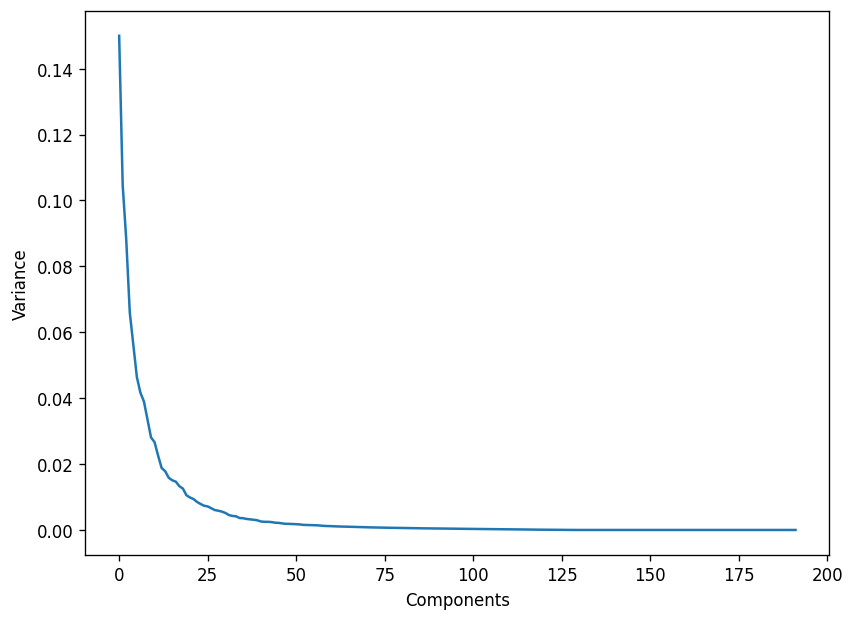

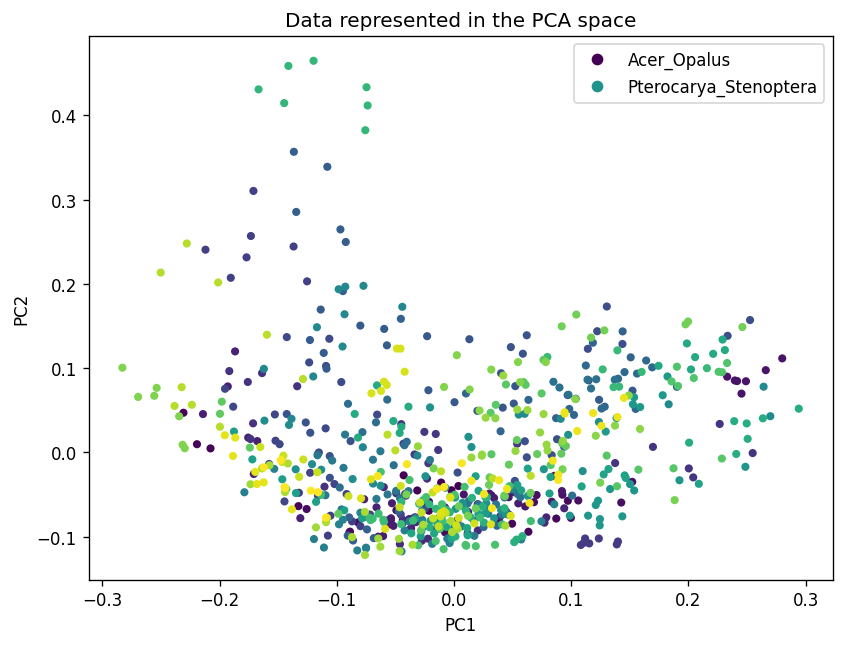

In [23]:
from sklearn.decomposition import PCA

# Project into the PCA space (2 major axis)
pca = PCA()
pcaSpace = pca.fit_transform(train_set.features)
pcaSpaceXY = (pcaSpace[:,0], pcaSpace[:,1])

# Plot PCA axis contributions
plt.figure(figsize=(8, 6), dpi=120)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel("Variance")
plt.xlabel("Components")
plt.show()

# Plot data in the PCA space (2 major axis)
plt.figure(figsize=(8, 6), dpi=120)
plt.xlabel("PC1")
plt.ylabel("PC2")
scatter = plt.scatter(x=pcaSpaceXY[0], y=pcaSpaceXY[1], c=train_set.labels, s=15)
plt.legend(handles=scatter.legend_elements(num=3)[0], labels=dl.classes)
plt.title("Data represented in the PCA space", loc='center', wrap=True)
plt.show()

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


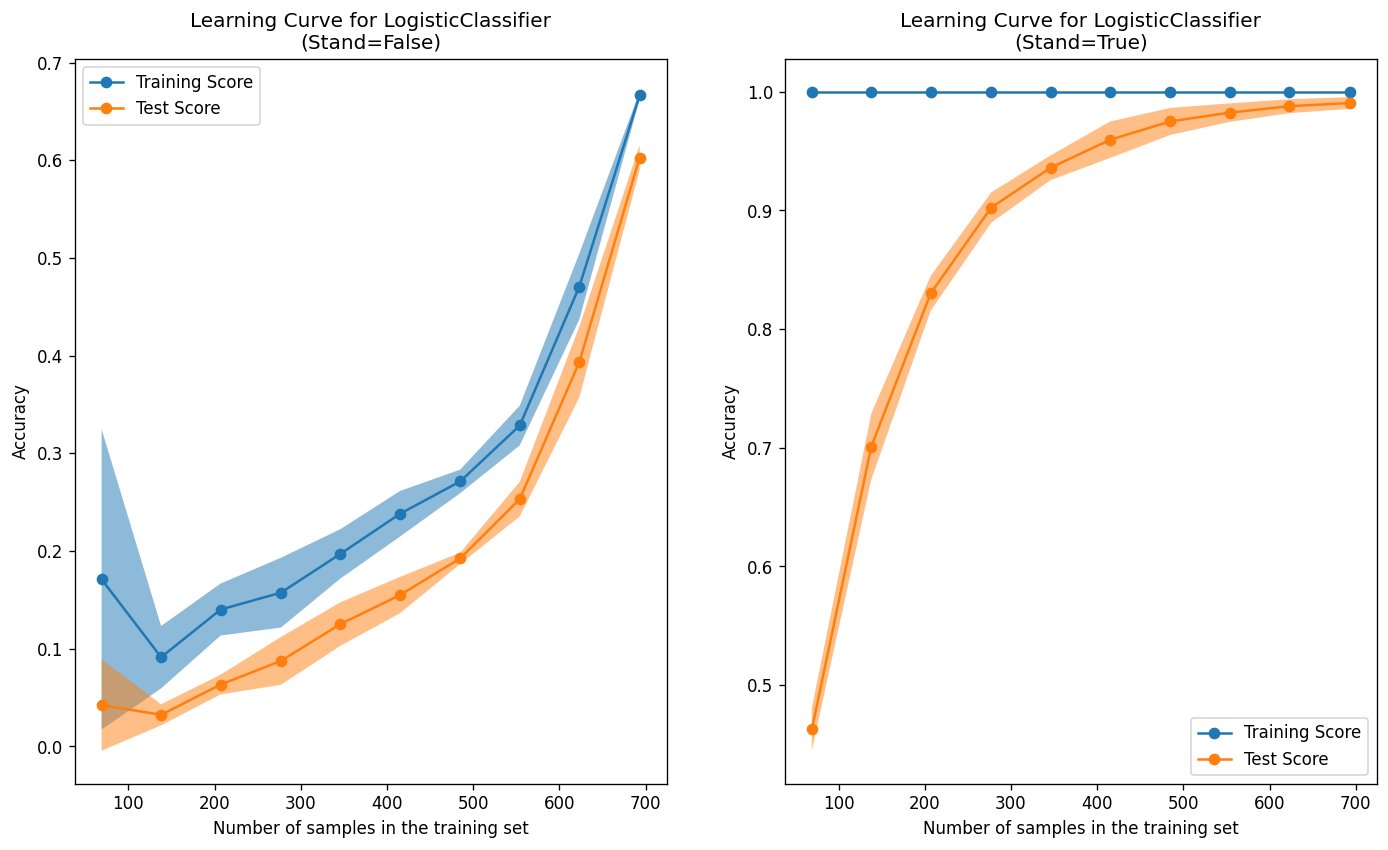

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


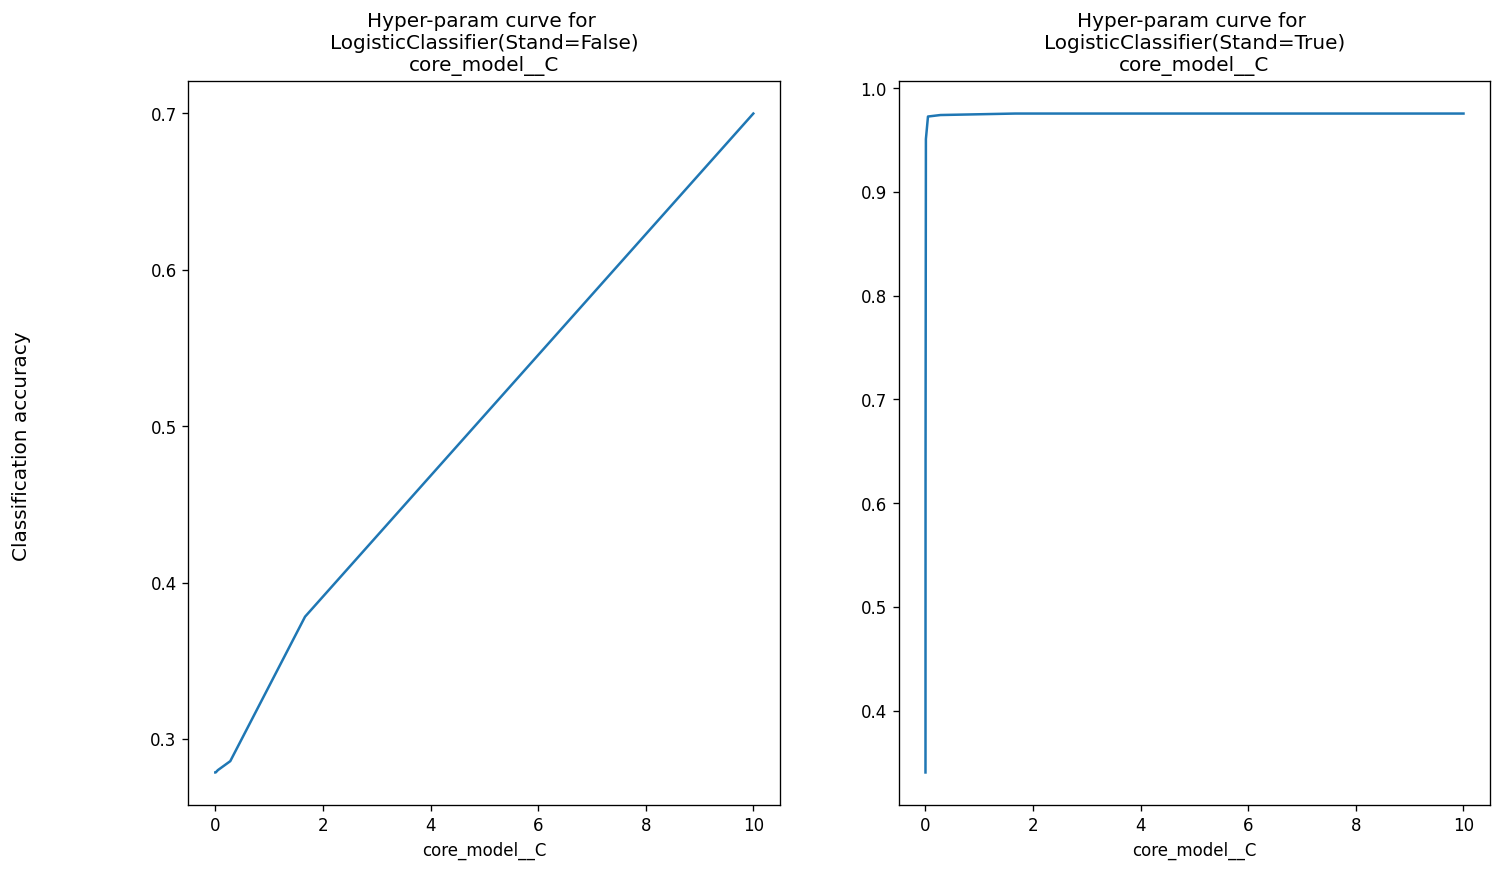

,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.906205,1.000000
Precision,0.906205,1.000000
Sensitivity,0.906205,1.000000
Specificity,0.999043,1.000000
Fallout,0.000957,0.000000
F1 Score,0.862048,1.000000
Log loss,2.388081,0.017721


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,LogisticClassifier (Stand=False),LogisticClassifier (Stand=True)
Accuracy,0.848485,0.989899
Precision,0.848485,0.989899
Sensitivity,0.848485,0.989899
Specificity,0.998454,0.999897
Fallout,0.001546,0.000103
F1 Score,0.779589,0.984925
Log loss,2.532187,0.104198


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


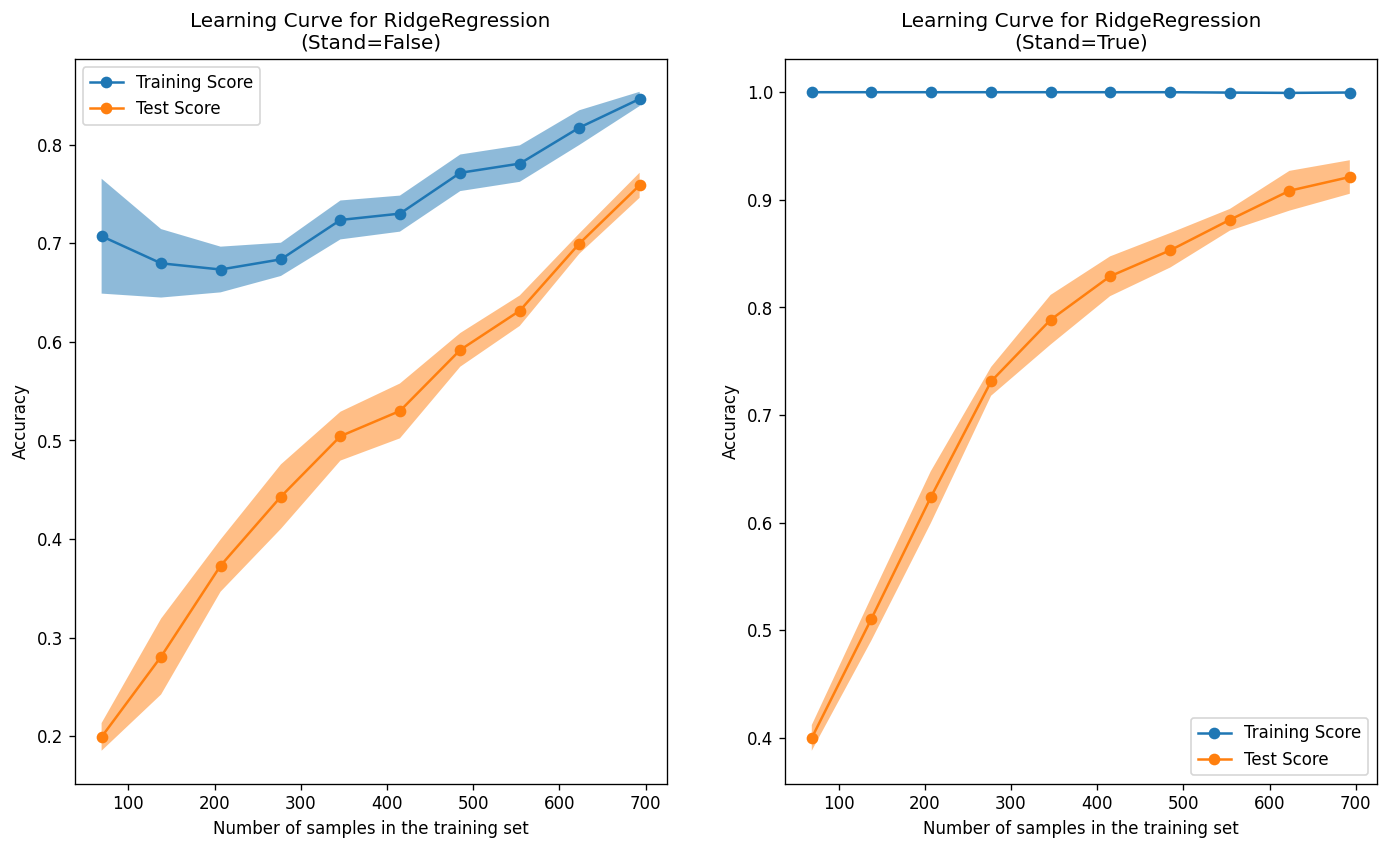

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


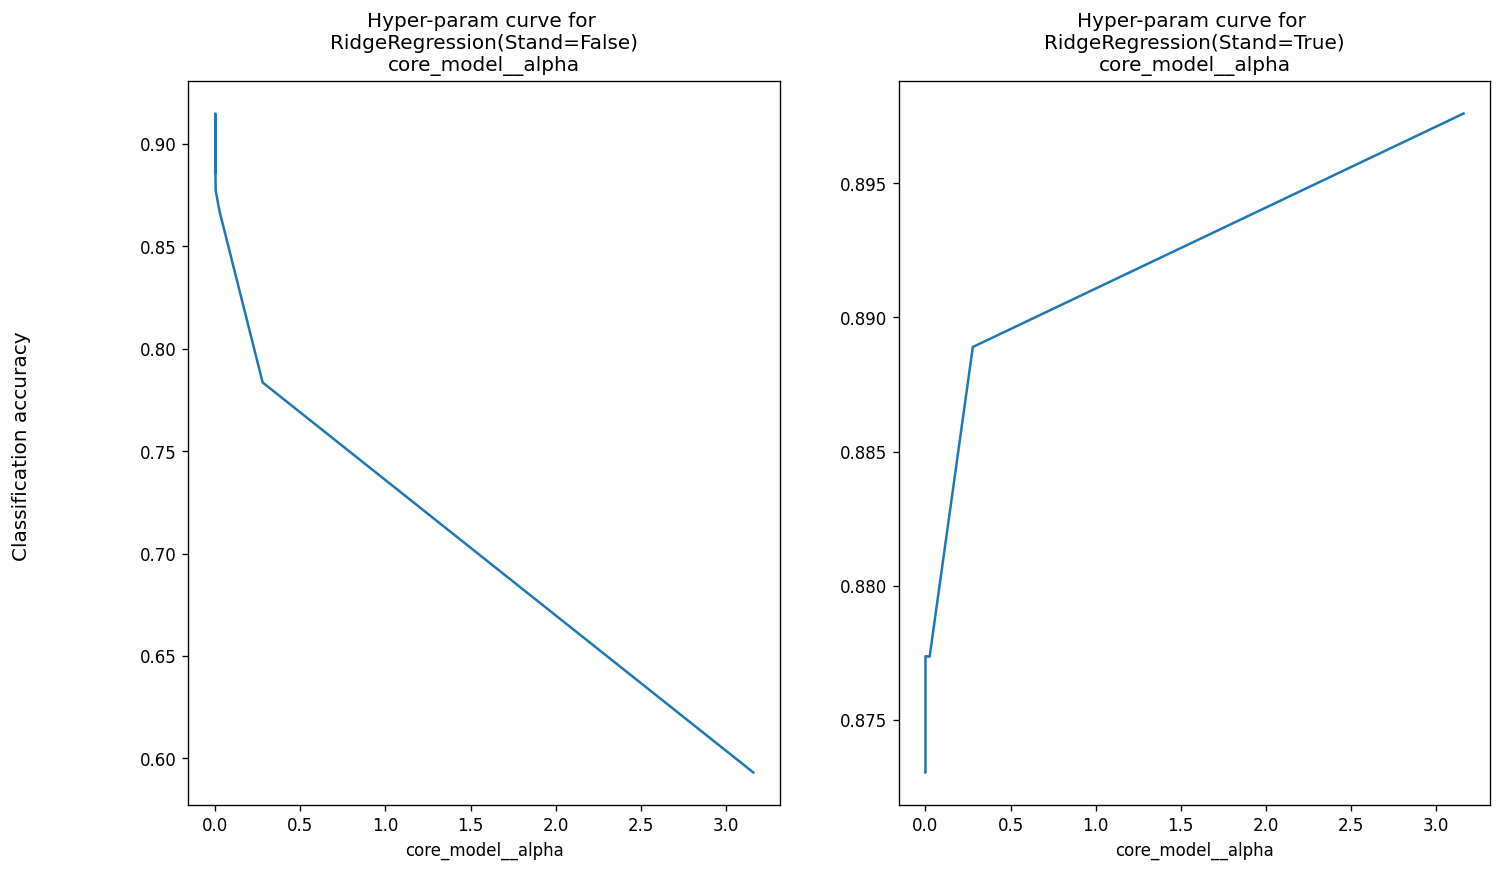

,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,0.9956709956709957,0.9985569985569985
Precision,0.9956709956709957,0.9985569985569985
Sensitivity,0.9956709956709957,0.9985569985569985
Specificity,0.9999558264864388,0.9999852754954796
Fallout,4.4173513561268665e-05,1.4724504520422888e-05
F1 Score,0.9935331802653671,0.997843370453498
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RidgeRegression (Stand=False),RidgeRegression (Stand=True)
Accuracy,0.9225589225589226,0.9225589225589226
Precision,0.9225589225589226,0.9225589225589226
Sensitivity,0.9225589225589226,0.9225589225589226
Specificity,0.9992097849240706,0.9992097849240706
Fallout,0.0007902150759293617,0.0007902150759293617
F1 Score,0.8857621234844798,0.8857621234844798
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


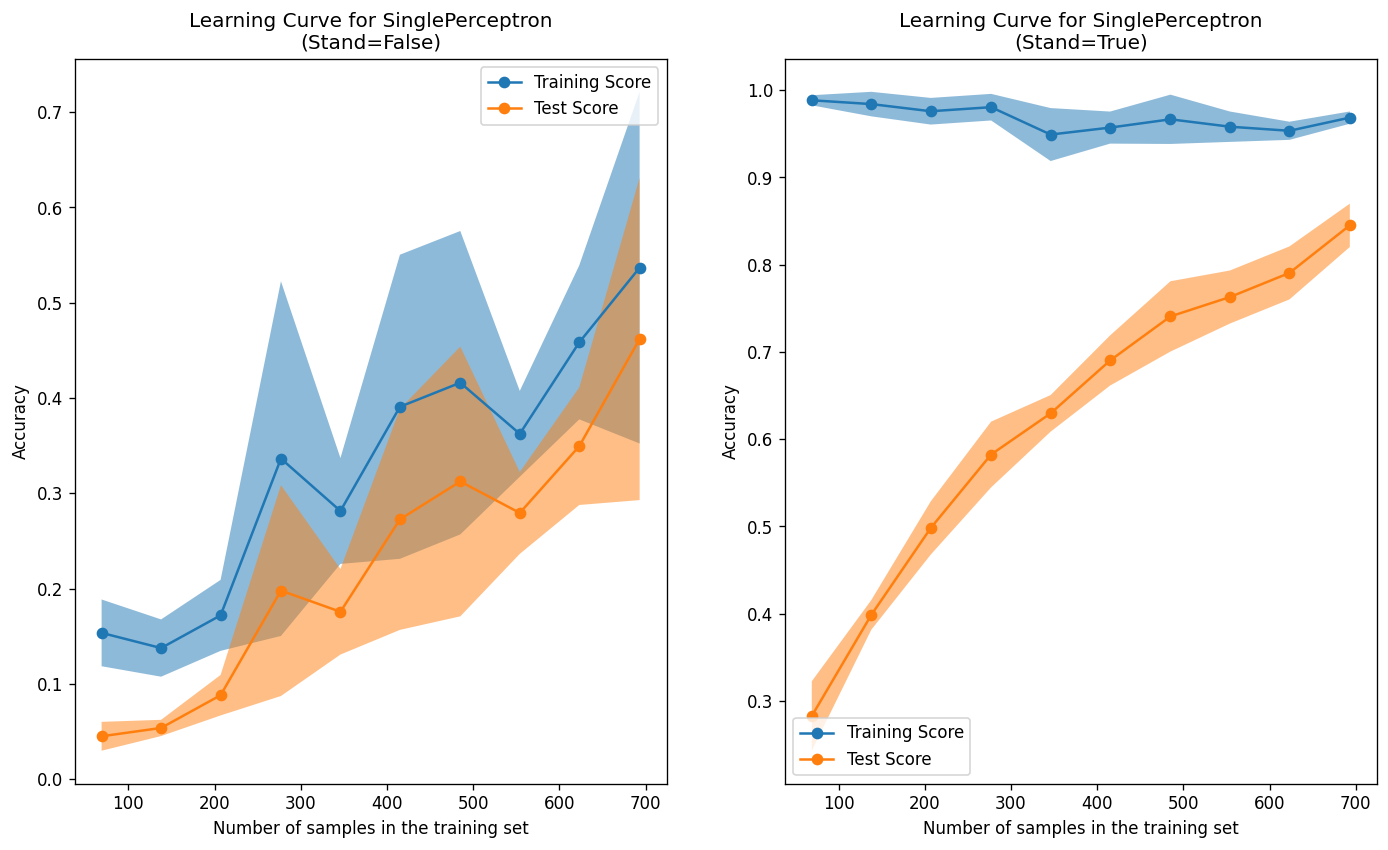

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


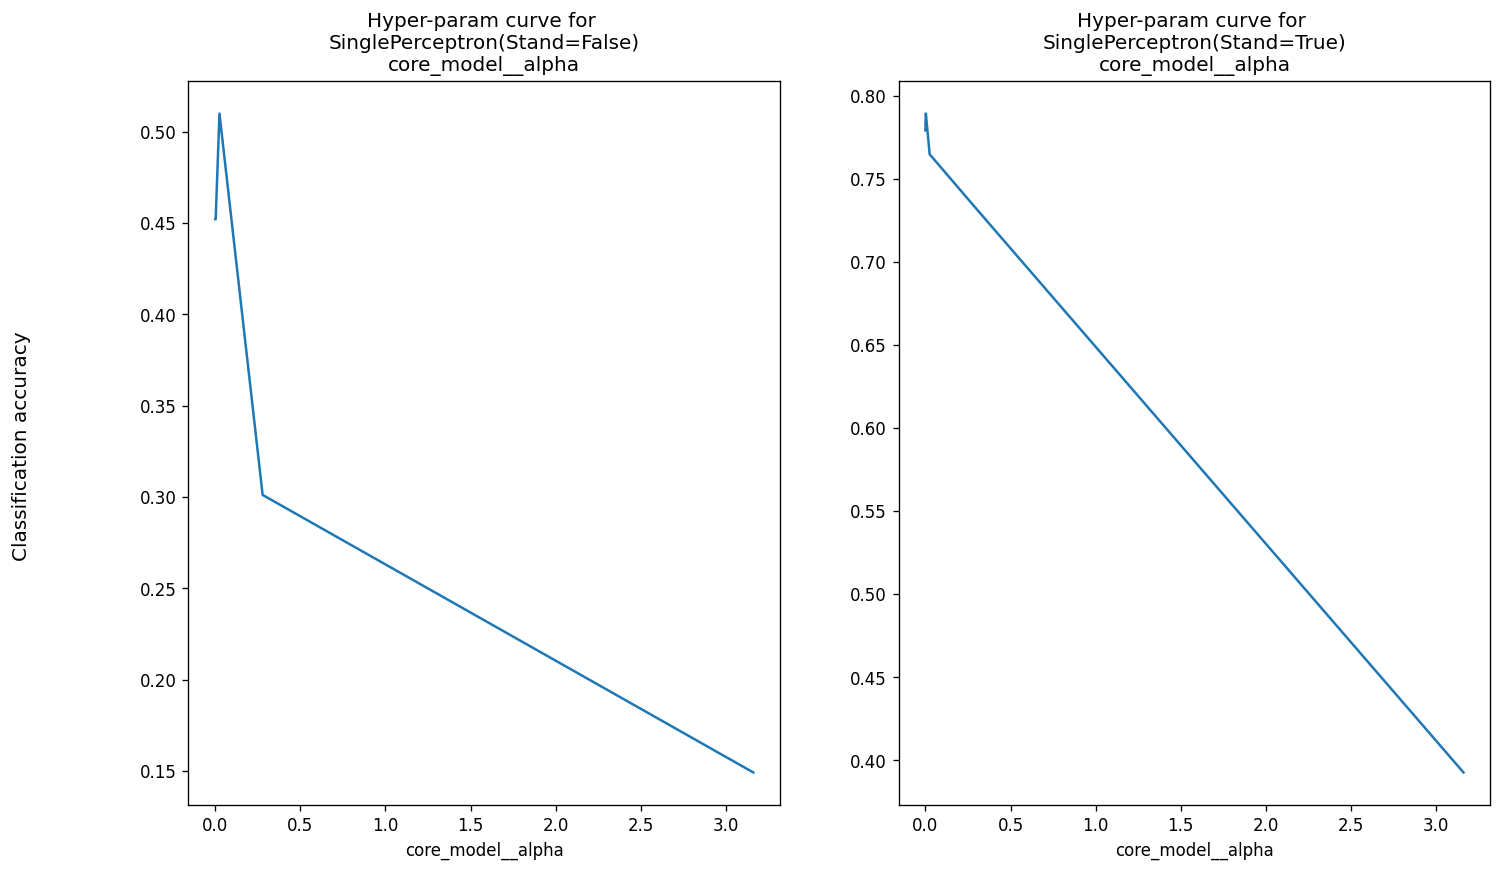

,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.8080808080808081,0.9812409812409812
Precision,0.8080808080808081,0.9812409812409812
Sensitivity,0.8080808080808081,0.9812409812409812
Specificity,0.9980416408987838,0.9998085814412345
Fallout,0.001958359101216244,0.00019141855876549755
F1 Score,0.7230900571082046,0.9720441945562912
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SinglePerceptron (Stand=False),SinglePerceptron (Stand=True)
Accuracy,0.7474747474747475,0.8114478114478114
Precision,0.7474747474747475,0.8114478114478114
Sensitivity,0.7474747474747475,0.8114478114478114
Specificity,0.997423211708926,0.9980759980759981
Fallout,0.002576788291074005,0.001924001924001924
F1 Score,0.6404024890645483,0.7277578191985422
Log loss,Not Applicable,Not Applicable


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


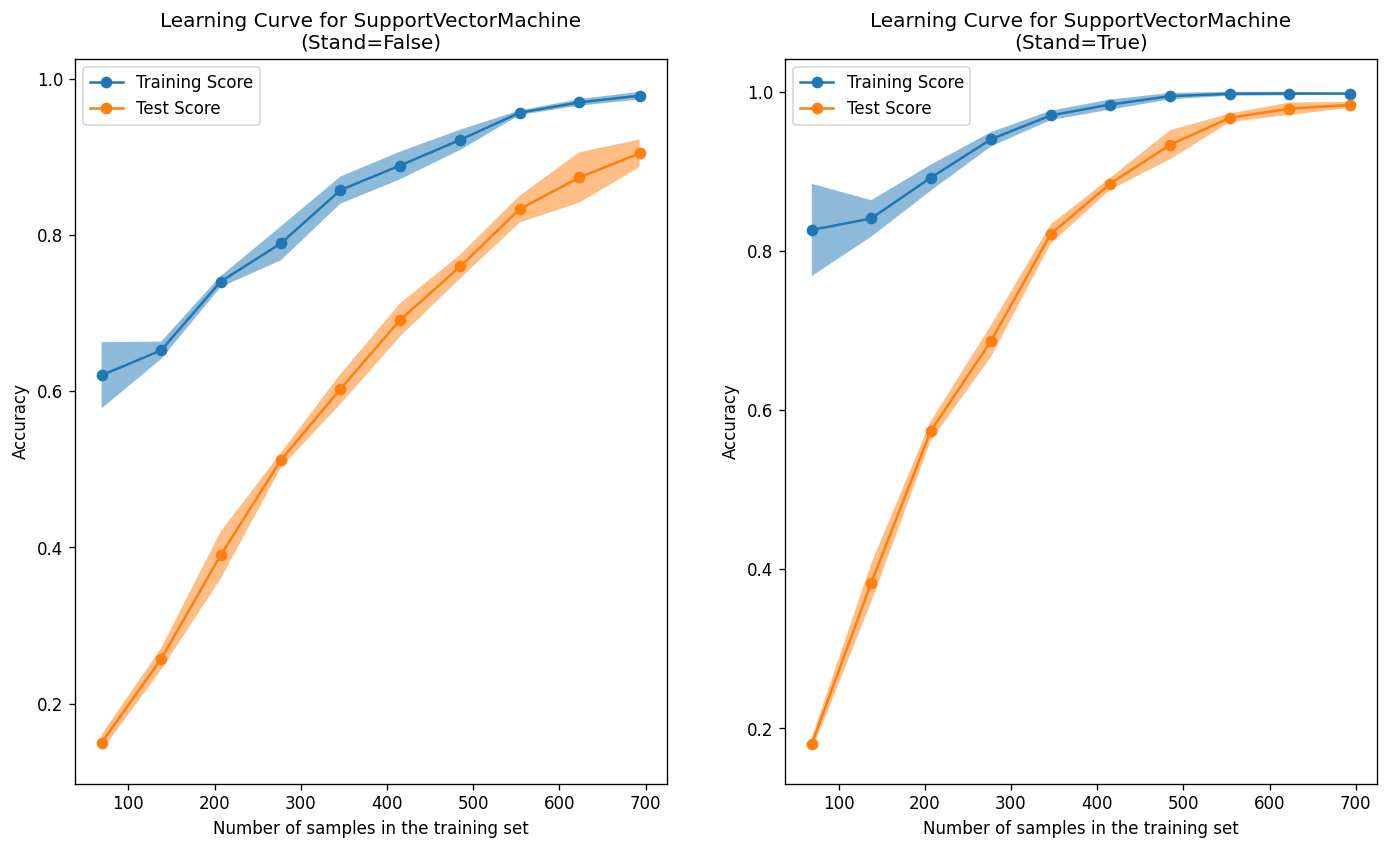

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


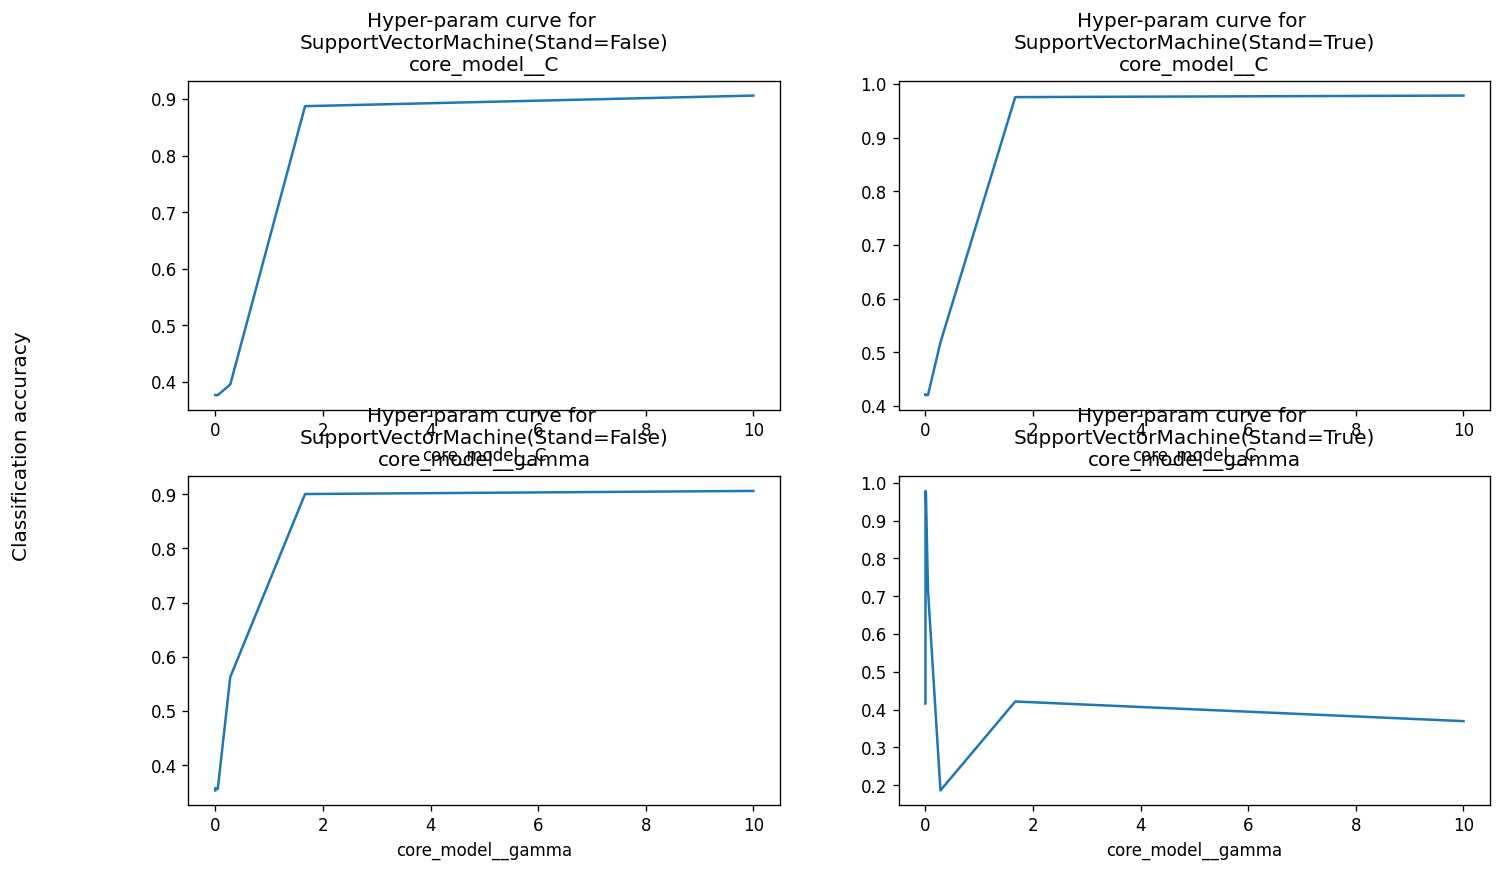

,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,1.000000,1.00000
Precision,1.000000,1.00000
Sensitivity,1.000000,1.00000
Specificity,1.000000,1.00000
Fallout,0.000000,0.00000
F1 Score,1.000000,1.00000
Log loss,2.182941,2.32946


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,SupportVectorMachine (Stand=False),SupportVectorMachine (Stand=True)
Accuracy,0.925926,0.973064
Precision,0.925926,0.973064
Sensitivity,0.925926,0.973064
Specificity,0.999244,0.999725
Fallout,0.000756,0.000275
F1 Score,0.890663,0.959914
Log loss,2.477993,2.490348


In [25]:
# Logistic Regression :
mt = ModelTester("LogisticClassifier")
mt.test(dataset, train_set, test_set)

# Ridge Regression : 
mt = ModelTester("RidgeRegression")
mt.test(dataset, train_set, test_set)

# Perceptron : 
mt = ModelTester("SinglePerceptron")
mt.test(dataset, train_set, test_set)

# SVM : 
mt = ModelTester("SupportVectorMachine")
mt.test(dataset, train_set, test_set)


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


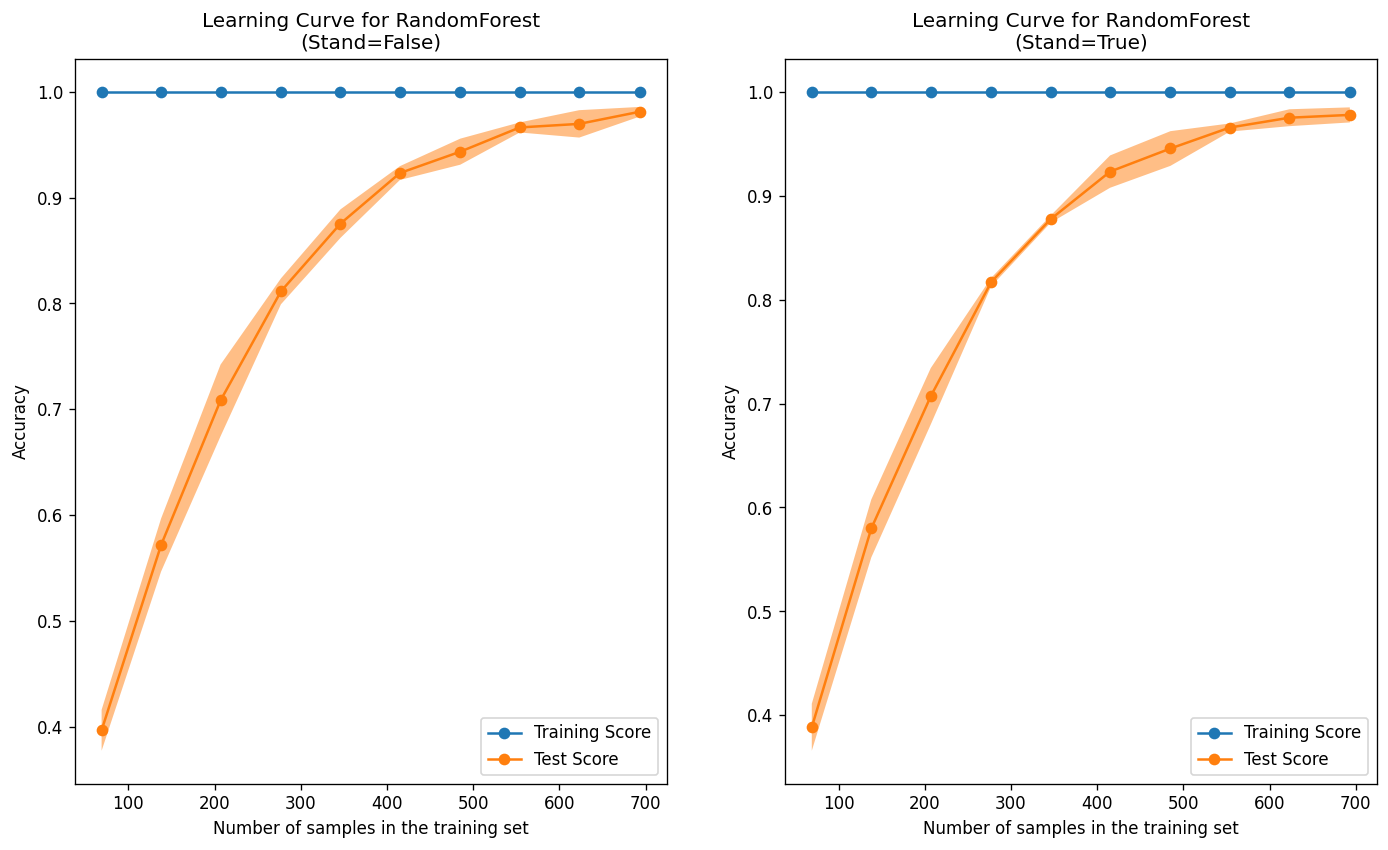

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,1.000000,1.00000
Precision,1.000000,1.00000
Sensitivity,1.000000,1.00000
Specificity,1.000000,1.00000
Fallout,0.000000,0.00000
F1 Score,1.000000,1.00000
Log loss,0.240321,0.24195


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,RandomForest (Stand=False),RandomForest (Stand=True)
Accuracy,0.973064,0.969697
Precision,0.973064,0.969697
Sensitivity,0.973064,0.969697
Specificity,0.999725,0.999691
Fallout,0.000275,0.000309
F1 Score,0.959914,0.954928
Log loss,0.835410,0.833273


~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


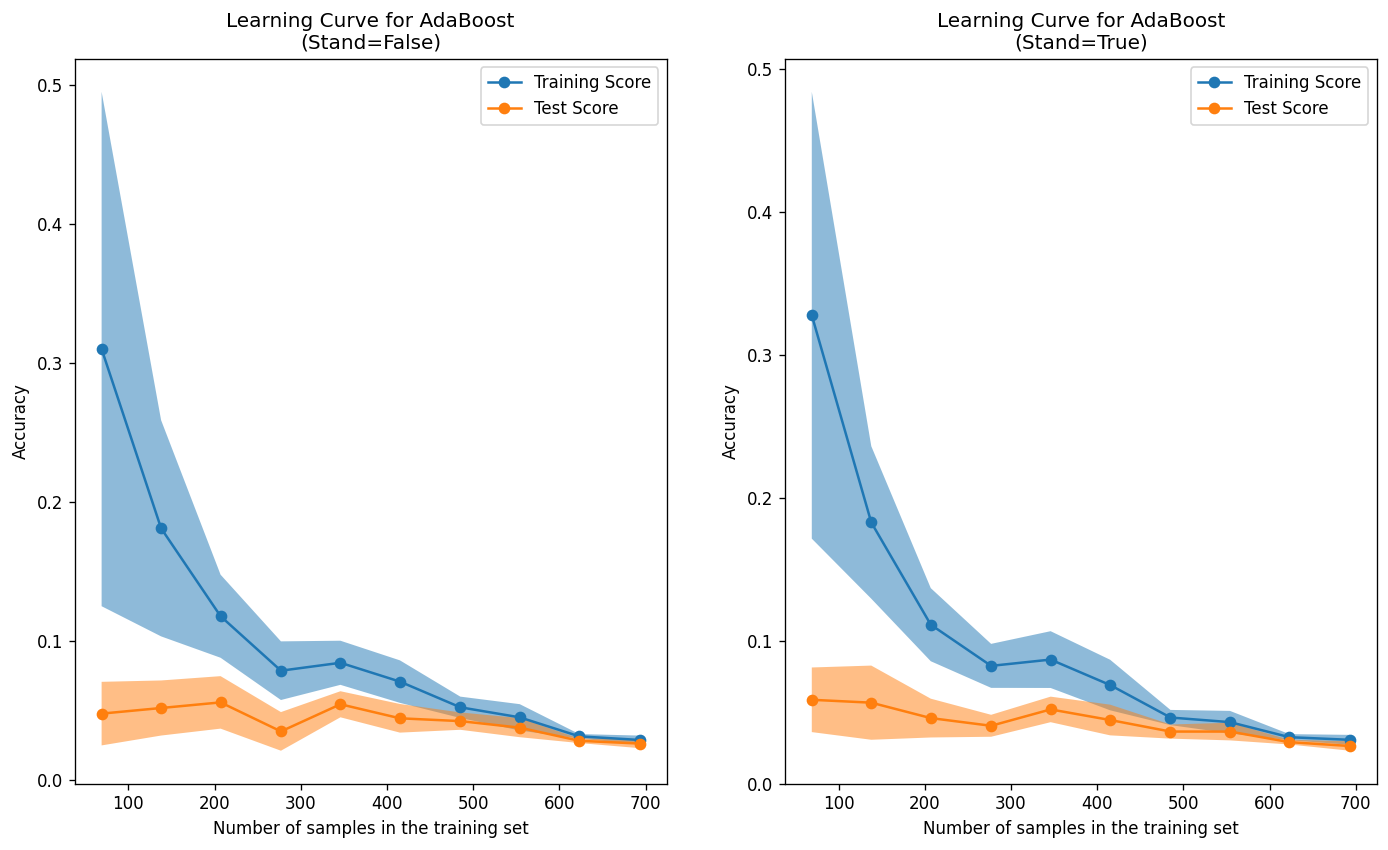

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


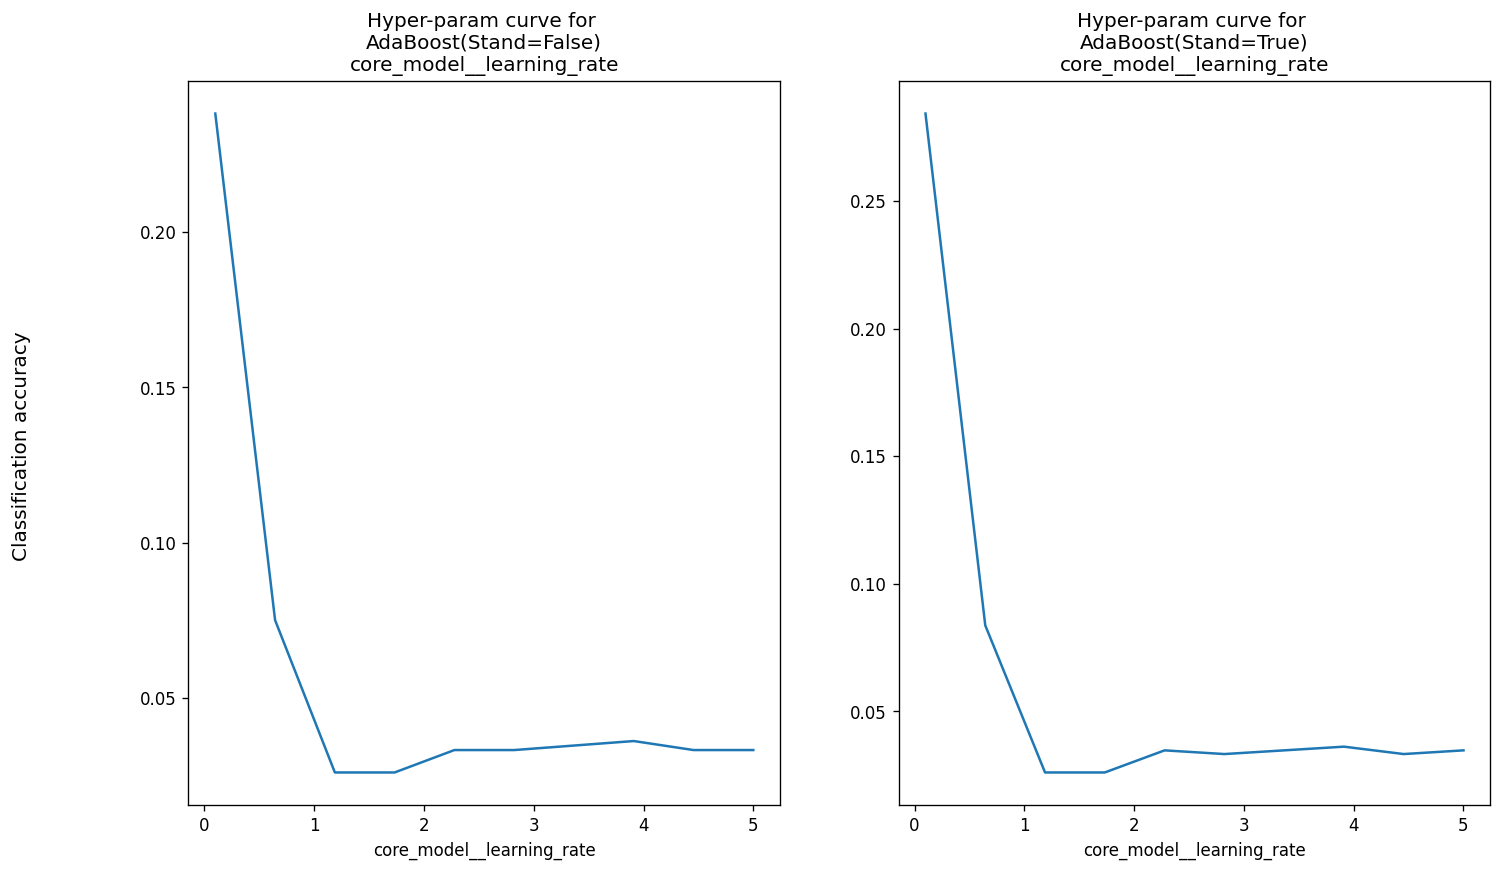

,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.447330,0.408369
Precision,0.447330,0.408369
Sensitivity,0.447330,0.408369
Specificity,0.994361,0.993963
Fallout,0.005639,0.006037
F1 Score,0.277597,0.237840
Log loss,2.989960,3.008060


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,AdaBoost (Stand=False),AdaBoost (Stand=True)
Accuracy,0.343434,0.303030
Precision,0.343434,0.303030
Sensitivity,0.343434,0.303030
Specificity,0.993300,0.992888
Fallout,0.006700,0.007112
F1 Score,0.176471,0.141718
Log loss,3.208603,3.239537


In [26]:
# Random Forest
mt = ModelTester("RandomForest")
mt.test(dataset, train_set, test_set)

# Ada Boost
mt = ModelTester("AdaBoost")
mt.test(dataset, train_set, test_set)

# Gradient Boosted Trees
# mt = ModelTester("GradientBoostedTrees")
# mt.test(dataset, train_set, test_set)

~~~~~~~~~~~~~~~ LEARNING CURVE ~~~~~~~~~~~~~~~


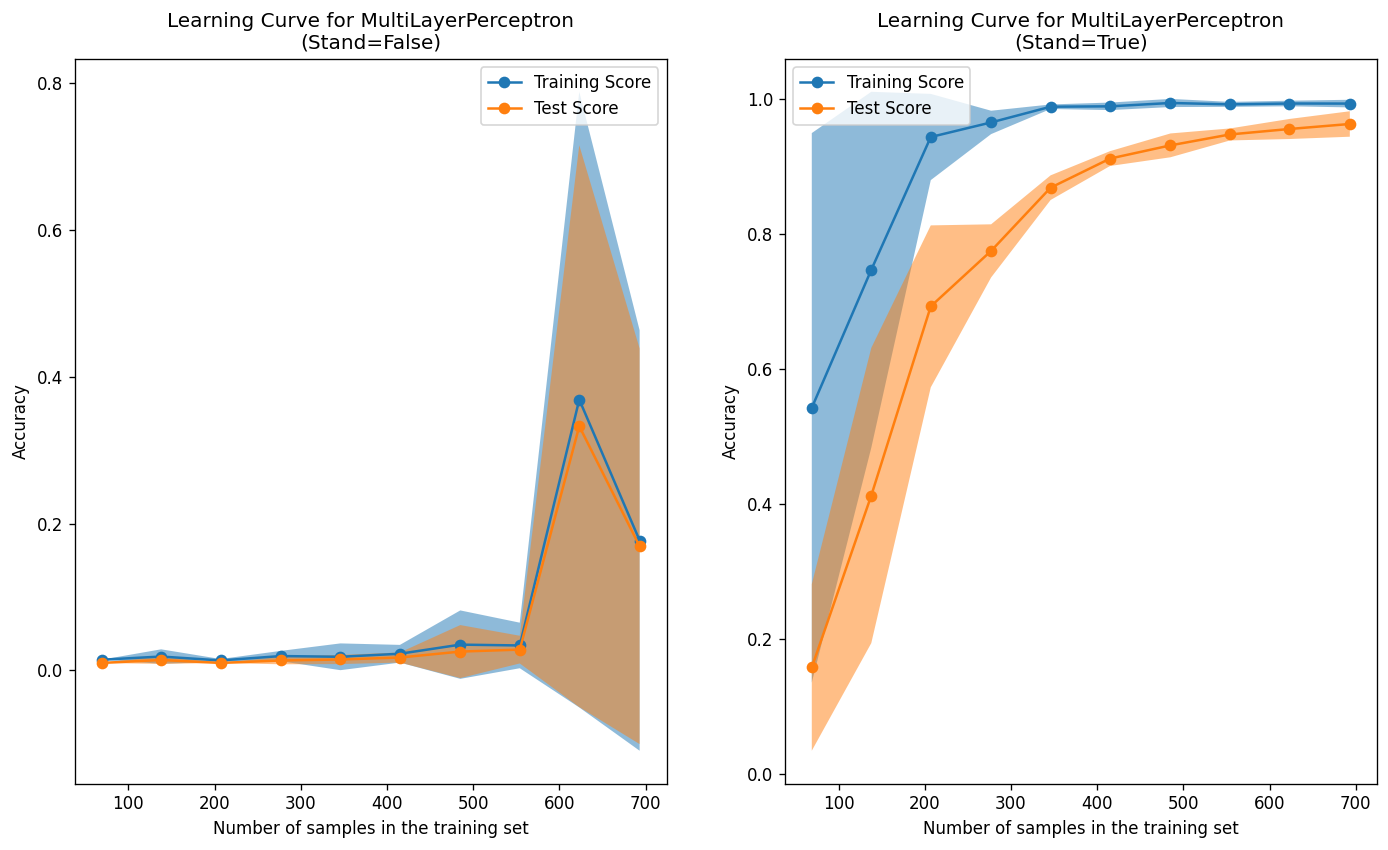

~~~~~~~~~~~~~~~ TRAIN SET ~~~~~~~~~~~~~~~


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,0.102453,0.989899
Precision,0.102453,0.989899
Sensitivity,0.102453,0.989899
Specificity,0.990841,0.999897
Fallout,0.009159,0.000103
F1 Score,0.019202,0.984925
Log loss,4.510994,0.122771


~~~~~~~~~~~~~~~ TEST SET ~~~~~~~~~~~~~~~


,MultiLayerPerceptron (Stand=False),MultiLayerPerceptron (Stand=True)
Accuracy,0.097643,0.956229
Precision,0.097643,0.956229
Sensitivity,0.097643,0.956229
Specificity,0.990792,0.999553
Fallout,0.009208,0.000447
F1 Score,0.017519,0.935047
Log loss,4.515174,0.284068


In [28]:
mt = ModelTester("MultiLayerPerceptron")
mt.test(dataset, train_set, test_set)